# 3-2. 繰り返し

制御構造のうち**繰り返し**について説明します。

参考:

- https://docs.python.org/ja/3/tutorial/controlflow.html#for-statements
- https://docs.python.org/ja/3/tutorial/controlflow.html#the-range-function
- https://docs.python.org/ja/3/tutorial/introduction.html#first-steps-towards-programming
- https://docs.python.org/ja/3/tutorial/controlflow.html#break-and-continue-statements-and-else-clauses-on-loops
- https://docs.python.org/ja/3/tutorial/controlflow.html#pass-statements

繰り返しを行う制御構造 `for` や `while` によって、同じ処理の繰り返しを簡単にプログラムすることができます。

## for文による繰り返し

2-2で、リストと文字列に対するfor文の繰り返しについて説明しました。
Pythonにおける**for文**の一般的な文法は以下のとおりです。

---
```Python
for 変数 in 文字列・リスト・辞書など:
    実行文
```

---

if文と同様、 実行文のインデントは深くなっていることに注意してください。

for文では `in` 以降に与えられる、`文字列・リスト・辞書など` にわたって、
`実行文` のグループを繰り返します。
一般に繰り返しの順番は文字列・リスト・辞書などに要素が現れる順番で、
要素は **`for`** と **`in`** の間の `変数` に代入されます。

リストの場合、リストの要素が最初から順番に取り出されます。以下に具体例を示します。関数 `len` は文字列の長さを返します。

In [ ]:
words = ['dog', 'cat', 'mouse']
for w in words:
    print(w, len(w))
print('finish')

このプログラムで、for文には3つの文字列で構成されるリスト `words` が与えられています。
リストの要素は変数 `w` に順番に代入され、文字列とその長さが印字されます。
そして、最後の要素の処理がおわればfor文の繰り返し（**ループ**）を抜け、完了メッセージを印字します。

次は文字列に対する for文の例です。文字列を構成する文字が先頭から一文字ずつ文字列として取り出されます。

In [1]:
word = 'supercalifragilisticexpialidocious'
for c in word:
    print(c)

s
u
p
e
r
c
a
l
i
f
r
a
g
i
l
i
s
t
i
c
e
x
p
i
a
l
i
d
o
c
i
o
u
s


組み込み関数 **`ord`** は与えられた文字の番号（コード）を整数として返します。
組み込み関数 **`chr`** は逆に与えられた整数をコードとする文字を返します。

In [3]:
print(ord('a'))
print(ord('b'))
print(ord('z'))

print(chr(97))

97
98
122
a


上で確認しているように、文字 `'a'`, `'b'`, `'z'` のコードはそれぞれ `97`, `98`, `112` です。文字のコードは `'a'` から `'z'` までは連続して `1` ずつ増えていきます。

これを用いて以下のように英小文字から成る文字列の中の各文字の頻度を求めることができます。

In [5]:
height = [0] * 26
for c in word:
    height[ord(c) - ord('a')] += 1

print(height)

[3, 0, 3, 1, 2, 1, 1, 0, 7, 0, 0, 3, 0, 0, 2, 2, 0, 2, 3, 1, 2, 0, 0, 1, 0, 0]


`height` を視覚化してみましょう。詳しくは、付録の 5-matplotlib を参照してください。

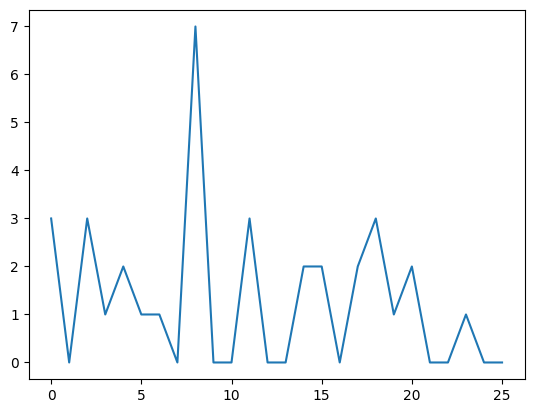

In [6]:
import matplotlib.pyplot as plt

plt.plot(height)

<BarContainer object of 26 artists>

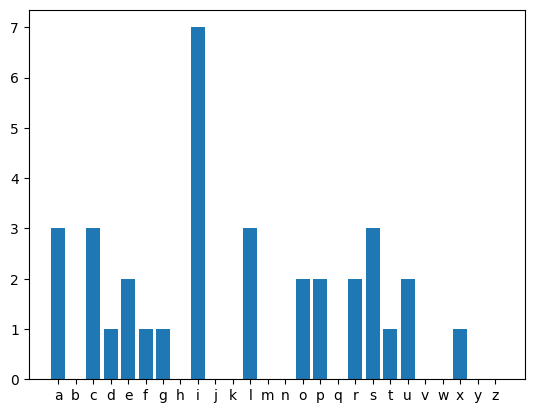

In [7]:
left = list(range(26))  # range関数については以下を参照してください。
labels = [chr(i + ord('a')) for i in range(26)]  # 内包表記については 6-1 を参照ください。
plt.bar(left,height,tick_label=labels)

## for文による繰り返しと辞書

辞書の要素にわたって操作を繰り返したい場合もfor文を用います。
辞書 `dic1` の全てのキーを変数 `key` に代入しながら、`実行文` を繰り返すには次のように書きます。

---
```Python
for key in dic1:
    実行文
```
---

`for` の行の `in` の後を、`dic1` の代わりに `dic1.keys()` としても振舞いは同等であり、辞書のキー一覧を返す **`keys`** メソッドが自動的に使われます。

次の例では、キーを1つずつ取り出し、`key` に代入した後、
`key` に対応する値を参照しています。

In [8]:
dic1 = {'cat': 3, 'dog': 3, 'elephant': 8}
for key in dic1:
    print('key:', key, ', value:', dic1[key])

key: cat , value: 3
key: dog , value: 3
key: elephant , value: 8


**`values`** メソッドを使えば（キーを使わずに）値を1つずつ取り出すこともできます。

In [9]:
dic1 = {'cat': 3, 'dog': 3, 'elephant': 8}
for value in dic1.values():
    print('value:', value)

value: 3
value: 3
value: 8


**`items`** メソッドを使えばキーと値を一度に取り出すこともできます。
次の例では、`in` の左辺に複数の変数を指定し多重代入を行っています。

In [10]:
dic1 = {'cat': 3, 'dog': 3, 'elephant': 8}
for key, value in dic1.items():
    print('key:', key, 'value:', value)

key: cat value: 3
key: dog value: 3
key: elephant value: 8


実は、辞書の `items` でなくとも、タプルのリストもしくはリストのリストに対しても、同様に複数の変数を指定することができます。

In [11]:
list1 = [[0, 10], [1, 20], [2, 30]]
for i, j in list1:
    print(i, j)

0 10
1 20
2 30


## 練習

辞書 `dic1` が引数として与えられたとき、次のような辞書 `dic2` を返す関数 `reverse_lookup2` を作成してください。ただし、 `dic1` のキー `key` の値が `value` である場合、 `dic2` には `value` というキーが登録されており、その値は `key` であるとします。また、 `dic1` は異なる2つのキーに対応する値は必ず異なるとします。

以下のセルの `...` のところを書き換えて `reverse_lookup2` を作成してください。

In [12]:
def reverse_lookup2(dic1):
    dic2={}
    for a in dic1.values():
        for b in dic1.keys():
            if dic1[b] == a:
                dic2[a] = b
    return dic2

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認してください。

In [13]:
print(reverse_lookup2({'apple': 3, 'pen': 5, 'orange': 7}) == {3: 'apple', 5: 'pen', 7: 'orange'})

True


## `range`

特定の回数の繰り返し処理が必要なときは、**`range`** 関数を用います。

---
```Python
for value in range(j):
    実行文
```
---

これによって実行文を `j` 回実行します。具体例を見てみましょう。

In [14]:
for value in range(5):
    print('Hi!')

Hi!
Hi!
Hi!
Hi!
Hi!


さて、`for` と `in` の間の `value` は変数ですが、 `value` には何が入っているのか確認してみましょう。

In [15]:
for value in range(5):
    print(value)

0
1
2
3
4


すなわち、`value` は `0` ～ `4` を動くことがわかります。

この `value` の値を用いることでリスト `ln` の要素を順番に用いることもできます。
回数としてリストの長さ `len(ln)` を指定します。

In [16]:
ln = ['e', 'd', 'a', 'c', 'f', 'b']
for value in range(len(ln)):
    print(ln[value])

e
d
a
c
f
b


`range()` 関数は:

1. 引数を1つ与えると `0` から引数までの整数列を返します。
    このとき引数の値は含まれないことの注意してください。
2. 引数を2つあるいは3つ与えると:
    * 最初の引数を数列の開始 (start)、2番目を停止 (stop)、3番目を数列の刻み (step) とする整数列を返します。
    * 3番目の引数は省略可能で、既定値は `1` となっています。
    * 2番目の引数の値は含まれないことの注意してください。

以下の例は、`0` から `9` までの整数列の総和を計算、印字するプログラムです:

In [17]:
s = 0
for i in range(10):
    s = s + i

print(s)

45


以下の例は、`1` から `9` までの奇数の総和を計算、印字するプログラムです。

In [18]:
s = 0
for i in range(1,10,2):
    s = s + i

print(s)

25


## 練習
引数で与えられる2つの整数 `x`, `y` 間（`x`, `y` を含む）の整数の総和を返す関数 `sum_n` を for文を利用して作成してください。
たとえば、`sum_n(1,3)` の結果は `1 + 2 + 3 = 6` となります。

以下のセルの `...` のところを書き換えて `sum_n` を作成してください。

In [32]:
def sum_n(x, y):
    k=0
    for a in range(y):
        k=k+a
    k=k+y
    return k

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認してください。

In [34]:
print(sum_n(1, 3)==6)

True


## 練習
整数 `int_size` を引数として取り、
長さが `int_size` であるリスト `ln` を返す関数 `construct_list` を作成してください。
ただし、 `ln` の `i` 番目の要素は `i` とします（`i` は 0 以上 `int_size-1` 以下の整数）。

以下のセルの `...` のところを書き換えて `construct_list(int_size)` を作成してください。

In [ ]:
def construct_list(int_size):


上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認してください。

In [ ]:
print(construct_list(10) == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## `range` とリスト
**`range`** 関数は整数列を返しますが、リストを返さないことに注意してください。
これは、繰り返し回数の大きな for文などで大きなリストを作ると無駄が大きくなるためです。

`range` 関数を利用して整数列のリストを生成するには、
以下のように `list` を関数として用いて、明示的にリスト化する必要があります。

In [ ]:
seq_list = list(range(5))
print(seq_list)

## for文の**入れ子**
for文を多重に**入れ子**（**ネスト**）して使うこともよくあります。  まずは次の例を実行してみてください。

In [ ]:
list1 = [['a', 'b', 'c'], ['d', 'e', 'f'], ['g', 'h', 'i'], ['j', 'k', 'l']]

for i in range(4):
    for j in range(3):
        print('list1の', i + 1, '番目の要素（リスト）の', j + 1, '番目の要素 =', list1[i][j])

`i = 0` のときに、2番目（内側）のfor文において、
`j` に `0` から `2` までの値が順に代入されて、各場合に `print` が実行されます。
その後、2番目の for文の実行が終わると、1番目（外側）のfor文の最初に戻って、
`i` の値に新しい値が代入されて、`i = 1` になります。
その後、再度 2番目のfor文を実行することになります。
このときに、この2番目の for文の中で `j` には再度、`0` から `2` までの値が順に代入されることになります。

決して、「最初に `j = 2` まで代入したから、
もう2番目のfor文は実行しない」という訳ではないことに注意してください。
一度for文の実行を終えて、再度同じfor文（上の例でいうところの2番目の for文）に戻ってきた場合、
その手続きはまた最初からやり直すことになるのです。

以下のプログラムは、変数 `C` に組み合わせの数をリストのリストとして求めます。

`C[i][j]` は、`i` 個から `j` 個を選ぶ組み合わせの数になります。

In [ ]:
C = [[1]]
for i in range(100):
    C.append([1]+[0]*i+[1])
    for j in range(i):
        C[i+1][j+1] = C[i][j] + C[i][j+1]

C[:10]

`C[100]` を視覚化してみましょう。

In [ ]:
plt.plot(C[100])

## 練習

次のような関数 `sum_lists` を作成してください。

- `sum_lists` はリスト `list1` を引数とします。
- `list1` の各要素はリストであり、そのリストの要素は数です。
- `sum_lists` は、`list1` の各要素であるリストの総和を求め、それらの総和を足し合せて返します。

以下のセルの `...` のところを書き換えて `sum_lists` を作成してください。

In [ ]:
def sum_lists(list1):
    ...

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認してください。

In [ ]:
print(sum_lists([[20, 5], [6, 16, 14, 5], [16, 8, 16, 17, 14], [1], [5, 3, 5, 7]]) == 158)

## 練習

リスト `list1` と `list2` が引数として与えられたとき、次のようなリスト `list3` を返す関数 `sum_matrix` を作成してください。

- `list1`, `list2`, `list3` は、3つの要素を持ちます。
- 各要素は大きさ3のリストになっており、そのリストの要素は全て数です。
- `list3[i][j]` （ただし、`i` と `j` は共に、0以上2以下の整数）は `list1[i][j]` と `list2[i][j]` の値の和になっています。

以下のセルの `...` のところを書き換えて `sum_matrix` を作成してください。

In [ ]:
def sum_matrix(list1, list2):
    ...

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認してください。

In [ ]:
print(sum_matrix([[1,2,3],[4,5,6],[7,8,9]], [[1,4,7],[2,5,8],[3,6,9]]) == [[2, 6, 10], [6, 10, 14], [10, 14, 18]])

## for文の**計算量**

山口和紀編「情報」第2版（東京大学出版会）には、「**計算量**とは、
アルゴリズムをもとにしたプログラムの実行時間を見積もるための指標である。」と書かれています。
さらに、「この見積もりは**計算量のオーダー**と呼ばれる非常におおまかな尺度で考える。」と書かれています。
（太字は引用時に追加しました。）

たとえば、リストに対するfor文
```Python
for x in リスト:
    要素xに対する処理
```
では、「要素に対する処理」が要素の数だけ実行されます。
この処理の時間が一定であるとすると、要素の数を $n$ としたとき、
全体の処理には $n$ に比例する時間がかかります。
このことを、**オーダー** $n$ といって、$O(n)$ と書きます。
一方、
```Python
for x in リスト:
    for y in 同じリスト:
        要素の組み合わせ(x,y)に対する処理
```
という二重のループでは、要素の組み合わせに対する処理が一定時間で終わるとしても、
ループの中でループが実行されるので、
全体の処理には、$n^2$ に比例する時間がかかります。
このことを $O(n^2)$ と書きます。
$n$ が10倍になったとき、
一重のループの実行時間は10倍にしかなりませんが、
二重ループの実行時間は100倍になります。
$n$ が100倍になったときは、前者は100倍ですが後者は10000倍になります。

二重ループが明らかでないこともあります。
以下の関数は、リストとして与えられたデータの平均と分散を計算するものです。

In [1]:
def average(d):
    s = 0
    for x in d:
        s = s + x
    return s/len(d)

def variance(d):
    s = 0
    for x in d:
        s = s + (x-average(d))**2
    return s/len(d)

ガウス分布から100個のデータと10000個のデータを生成して分散を計算してみましょう。

In [2]:
import random
d100 = []
for i in range(100):
    d100.append(random.gauss(0,10))
d10000 = []
for i in range(10000):
    d10000.append(random.gauss(0,10))

In [3]:
variance(d100)

87.41794500440339

In [4]:
variance(d10000)

97.34076408843254

10000個の場合は相当に時間がかかることがわかります。
これは、`variance` のfor文の中で `average` を呼んでいるためです。
見かけ上は一重ループなのですが、`average` の中にもループがあるため、
二重ループと同じ時間がかかります。
したがって、10000個の場合は、100個の場合に比べて10000倍時間がかかります。

ローカル変数を用いて `variance` の定義を書き直してみましょう。

In [ ]:
def variance(d):
    av = average(d)
    s = 0
    for x in d:
        s = s + (x-av)**2
    return s/len(d)

In [ ]:
variance(d100)

In [ ]:
variance(d10000)

10000個の場合でも一瞬で実行が終わったことでしょう。
この場合、一重のループを2回実行しているだけだからです。

##  **`enumerate`**
for文の繰り返し処理では、要素の順序を把握したいことがあります。
これまで学んだ方法では以下のように書けます。

---
```Python
i = 0
for val in some_list:
    print(i, val)
    # 繰り返させたい処理
    i += 1
```

---

Pythonでは `enumerate()` 関数が用意されており、上のプログラムは以下のように書き換えることができます。

---
```Python
for i, val in enumerate(some_list):
    # 繰り返させたい処理
```

---

2つの変数 `i`, `val` が指定されています。
`i` には `0`, `1`, `2`, ... が順に代入されます。
`val` にはリストの要素が順に代入されます。

たとえば、リストの要素をキー、そのインデックスを値とする辞書が欲しい場合は、以下のように書くことができます。

In [ ]:
words = ['dog', 'cat', 'mouse']
mapping = {}
for i, w in enumerate(words):
    mapping[w] = i

print(mapping)            # {'dog': 0, 'cat': 1, 'mouse': 2} が得られる。

## **`in`**
Pythonでは `for` ループでリストを展開する `in` とは別に、
2-2 で説明したように、リスト内の要素の有無を検査する **`in`** 演算子と **`not in`** 演算子が定義されています。
以下のように、`if` 文の条件に `in` が出現した場合、for文とは動作が異なるので注意してください。

---

```Python
colors = ['red', 'green', 'blue']
color = 'red'

if color in colors:
    # do something
```

---


## while文による繰り返し

**while文**では **`while`** の後の条件式が `False` となるまで、実行文グループを繰り返します。

下記のプログラムでは、$\sum_{x=1}^{10}x$ が `total` の値となります。

In [5]:
x = 1
total = 0
while x <= 10:
    total += x
    x += 1

print(x, total)

11 55


条件式が `False` になったときに、 while文から抜けているので、
終了後の `x` の値が `11` になっていることに注意してください。
なお、上の例を for文で実行する場合には以下のようになります。

In [6]:
total = 0
for x in range(11):
    total += x

print(x, total)

10 55


##  制御構造とreturn文

**return文**は1-2で説明したように関数を終了し、値を返す（返値）機能を持ちます。
`if`, `for`, `while` といった制御構造の中でreturn文が実行された場合、
ただちに関数の処理を終了し、その後の処理は行われません。

以下の関数 `simple_lsearch` は与えられたリスト、`lst` に `myitem` と等しいものがあれば `True` を、なければ `False` を返します。

- 2行目のfor文で `lst` の各要素に対して繰り返しを実行するように指定されています。
- 3行目のif文で要素 `item` が `myitem` と等しい場合、4行目の `return True` でただちに関数を終了しています。
- for文で全てのリスト要素に対してテストが終わり、等しいものがない場合は、5行目の `return False` が実行されます。

In [7]:
def simple_lsearch(lst, myitem):
    for item in lst:
        if item == myitem:
            return True
    return False

## **break文**
**break文**は、 for文もしくはwhile文の実行文グループで利用可能です。
break文は実行中のプログラムで最も内側の繰り返し処理を中断し、そのループを終了させる目的で利用されます。
以下のプログラムは、初項 `256`、公比 1/2、の等比級数の和を求めるものです。
ただし、総和が `500` をこえれば打ち切られます。

In [ ]:
x = 256
total = 0
while x > 0:
    if total > 500:
        break           # 500 を超えれば while ループを抜ける
    total += x
    x = x // 2          # // は少数点以下を切り捨てる除算

print(x, total)

## 練習

文字列 `str1` と `str2` が引数として与えられたとき、
`str1` が `str2` を部分文字列として含むかどうか判定する関数 `simple_match` を作成してください。
具体的には、`str2` を含む場合、
その部分文字列が開始される `str1` のインデックスを返値として返してください。
`str2` を含まない場合、 `-1` を返してください。
ただし、`simple_match` の中で文字列のメソッドやモジュール（正規表現など）を使ってはいけません。

以下のセルの `...` のところを書き換えて `simple_match` を作成してください。

In [ ]:
def simple_match(str1, str2):
    ...

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認してください。

In [ ]:
print(simple_match('location', 'cat') == 2)
print(simple_match('soccer', 'cat') == -1)
print(simple_match('category', 'cat') == 0)
print(simple_match('carpet', 'cat') == -1)

## **continue文**
continue文はbreak文同様に、`for` および `while` ループの実行文グループで利用可能です。
continue文は実行中のプログラムで最も内側の繰り返し処理を中断し、次のループの繰り返しの処理を開始します。

下記のプログラムでは、`colors` リストの `'black'` は印字されませんが `'white'` は印字されます。

In [ ]:
colors = ['red', 'green', 'blue', 'black', 'white']
for c in colors:
    if c == 'black':
           continue
    print(c)

## ▲for文とwhile文における **`else`**
for文およびwhile文では `else` を書くこともできます。
この実行文グループは、ループの最後に一度だけ実行されます。

In [ ]:
colors = ['red', 'green', 'blue', 'black', 'white']
for c in colors:
    if c == 'black':
        continue
    print(c)
else:
    print('')

for文およびwhile文の `else` ブロックの内容は `continue` で終了したときは実行されますが、一方で
`break` でループを終了したときは実行されません。

## **pass文**

Pythonでは空の実行文グループは許されていません。
一方で、空白のコードブロックを用いることでプログラムが読みやすくなる場合があります。
たとえば以下の、`if` ... `elif` ... `else` プログラムはエラーとなります。

In [ ]:
x = -1
if x < 0:
    print('x is positive')
elif x == 0:
    # IndentationError: expected an indented block
elif 0 < x < 5:
    print('x is positive and smaller than 5')
else:
    print('x is positive and larger than or equal to 5')

なにもしないpass文を用いて、以下のように書き換えることで正常に実行されます。

In [ ]:
x = -1
if x < 0:
    print('x is positive')
elif x == 0:
    # no error
    pass
elif 0 < x < 5:
    print('x is positive and smaller than 5')
else:
    print('x is positive and larger than or equal to 5')

## 練習

以下のプログラムでは1秒おきに `print` が永久に実行されます。

---
```Python
from time import sleep

while True:
    print('Yeah!')
    sleep(1)
```
---

10回 `print` が実行された後にwhile文を終了するように書き換えてください。
実行中のセルを停止させるには、ストップボタンが使えます。

## 練習

英語の文章からなる文字列 `str_engsentence` が引数として与えられたとき、
`str_engsentence` 中に含まれる3文字以上の全ての英単語を要素とするリストを返す関数
`collect_engwords` を作成してください。ただし、同じ単語を重複して含んでいて構いません。

以下のセルの `...` のところを書き換えて `collect_engwords(str_engsentence)` を作成してください。

In [ ]:
def collect_engwords(str_engsentence):
    ...

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認してください。

In [ ]:
print(collect_engwords('Unfortunately no, it requires something with a little more kick, plutonium.') == ['Unfortunately', 'requires',
'something', 'with', 'little', 'more', 'kick', 'plutonium'])

## 練習

2つの同じ大きさのリストが引数として与えられたとき、
2つのリストの奇数インデックスの要素を入れ替えて、
その結果得られる2つのリストをタプルにして返す関数 `swap_lists` を作成してください
（ただし、0 は偶数として扱うものとします）。
与えられたリストは破壊しても構いません。

以下のセルの `...` のところを書き換えて `swap_lists(ln1, ln2)` を作成してください。

In [ ]:
def swap_lists(ln1, ln2):
    ...

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認してください。

In [ ]:
print(swap_lists([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e']) == ([1, 'b', 3, 'd', 5], ['a', 2, 'c', 4, 'e']))

## 練習
文字列 `str1` を引数として取り、
`str1` の中に含まれる大文字の数を返す関数 `count_capitalletters` を作成してください。

以下のセルの `...` のところを書き換えて `count_capitalletters(str1)` を作成してください。

In [ ]:
def count_capitalletters(str1):
    ...

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認してください。

In [ ]:
print(count_capitalletters('Que Será, Será') == 3)

## 練習

長さが 3 の倍数である文字列 `str_augc` が引数として与えられたとき、
`str_augc` を長さ 3 の文字列に区切り、それらを順に格納したリストを返す関数 `identify_codons` を作成してください。

以下のセルの `...` のところを書き換えて `identify_codons(str_augc)` を作成してください。

In [ ]:
def identify_codons(str_augc):
    ...

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認してください。

In [ ]:
print(identify_codons('CCCCCGGCACCT') == ['CCC', 'CCG', 'GCA', 'CCT'])

## 練習

正の整数 `int1` が引数として与えられたとき、
`int1` の値の下桁から3桁毎にコンマ (`,`) を入れた文字列を返す関数 `add_commas` を作成してください。
ただし、数の先頭にコンマを入れる必要はありません。

以下のセルの `...` のところを書き換えて `add_commas` を作成してください。

In [ ]:
def add_commas(int1):
    ...

上のセルで解答を作成した後、以下のセルを実行し、全ての実行結果が `True` になることを確認してください。

In [ ]:
print(add_commas(14980) == '14,980')
print(add_commas(3980) == '3,980')
print(add_commas(298) == '298')
print(add_commas(1000000) == '1,000,000')

## 練習

リスト `list1` が引数として与えられ、次のような文字列 `str1` を返す関数 `sum_strings` を作成してください。

`list1` は `k` 個の要素を持つとします（ただし、`k` は正の整数）。
`list1` の要素が文字列でなければ文字列に変換してください。
その上で、`list1` の1番目から `k-2` 番目の各要素の後ろにコンマとスペースからなる文字列 `', '` を加え、
`k-1` 番目の要素の後ろには、`' and '` を加え、1番目から `k` 番目までの要素を繋げた文字列を `str1` とします。

以下のセルの `...` のところを書き換えて `sum_strings` を作成してください。

In [ ]:
def sum_strings(list1):
    ...

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認してください。

In [ ]:
print(sum_strings(['a', 'b', 'c', 'd']) == 'a, b, c and d')
print(sum_strings(['a']) == 'a')
print(sum_strings([1, 2, 3]) == '1, 2 and 3')

## 練習

辞書 `dic1` と長さ 10 以下の文字列 `str1` が引数として与えられたとき、
以下のように `dic1` を変更する関数 `handle_collision2` を作成してください。
ただし、`dic1` のキーは、1 以上 10 以下の整数、キーに対応する値は文字列とします。

1. `dic1` に `str1` の長さ `n` がキーとして登録されていない場合、`dic1` に キー `n`、`n` に対応する値 `str1` を登録します。
2. `dic1` に `str1` の長さ `n` がキーとして登録されている場合、`i` の値を `n+1`, `n+2`, ...と1つずつ増やしていき、`dic1` にキーとして登録されていない値 `i` を探します。キーとして登録されていない値 `i` が見つかった場合、その `i` をキー、`i` に対応する値として `str1` を登録してください。 ただし、`i` を 10 まで増やしても登録されていない値が見つからない場合は、`i` を 1 に戻した上で `i` を増やす作業を続行してください。
3. 2の手順によって、登録可能な `i` が見つからなかった場合、`dic1` を変更しません。

以下のセルの `...` のところを書き換えて `handle_collision2(dic1, str1)` を作成してください。

In [ ]:
def handle_collision2(dic1, str1):
    ...

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認してください。

In [ ]:
dic1_orig = {6: 'Styles', 4: 'Link', 7: 'Ackroyd'}
handle_collision2(dic1_orig, 'Big Four')
print(dic1_orig == {6: 'Styles', 4: 'Link', 7: 'Ackroyd', 8: 'Big Four'})
dic1_orig = {6: 'Styles', 4: 'Link', 7: 'Ackroyd', 8: 'Big Four', 10: 'Blue Train', 9: 'End House'}
handle_collision2(dic1_orig, 'Edgware')
print(dic1_orig == {6: 'Styles', 4: 'Link', 7: 'Ackroyd', 8: 'Big Four', 10: 'Blue Train', 9: 'End House', 1: 'Edgware'})
dic1_orig = {6: 'Styles', 4: 'Link', 7: 'Ackroyd', 8: 'Big Four', 10: 'Blue Train', 9: 'End House', 1: 'Edgware', 2: 'Orient', 3: 'Three Act', 5: 'Clouds'}
handle_collision2(dic1_orig, 'ABC')
print(dic1_orig == {6: 'Styles', 4: 'Link', 7: 'Ackroyd', 8: 'Big Four', 10: 'Blue Train', 9: 'End House', 1: 'Edgware', 2: 'Orient', 3: 'Three Act', 5: 'Clouds'})

## 練習

整数を最初の要素、文字列をその次の要素とするリスト（これを子リストと呼びます）を要素とするリスト
`list1` が引数として与えられたとき、次のような辞書 `dic1` を返す関数 `handle_collision3` を作成してください。

* 各子リスト `list2` に対して、`dic1` のキーは `list2` の最初の要素である整数とし、そのキーに対応する値は次の要素である文字列とします。
* 2つ以上の子リストの最初の要素が同じ整数である場合、`list1` においてより小さいインデックスを持つ子リストの文字列を、その整数のキーに対応する値とします。

以下のセルの `...` のところを書き換えて `handle_collision3(list1)` を作成してください。

In [ ]:
def handle_collision3(list1):
    ...

上のセルで解答を作成した後、以下のセルを実行し、実行結果が True になることを確認してください。

In [ ]:
print(handle_collision3([[3, 'Richard III'], [1, 'Othello'], [2, 'Tempest'], [3, 'King John'], [4, 'Midsummer'], [1, 'Lear']]) == {1: 'Othello', 2: 'Tempest', 3: 'Richard III', 4: 'Midsummer'})

## 練習の解答

In [ ]:
def reverse_lookup2(dic1):
    dic2 = {}  #辞書を初期化する
    for key, value in dic1.items():
        dic2[value] = key
    return dic2
#reverse_lookup2({'apple':3, 'pen':5, 'orange':7})

In [ ]:
def sum_n(x,y):
    sum = 0
    for i in range(x, y + 1):
        sum = sum + i
    return sum
#sum_n(1,3)

In [ ]:
def construct_list(int_size):
    ln = int_size * [0]
    for i in range(int_size):
        ln[i] = i
    return ln
#construct_list(10)

In [ ]:
def sum_lists(list1):
    total = 0
    for list2 in list1:  # for j in range(len(list1)):とlist2 = list1[j]としてもよい
        #print(list2)
        for i in range(len(list2)):
            #print(i, list2[i])
            total += list2[i]
    return total

In [ ]:
def sum_matrix(list1, list2):
    list3 = [[0,0,0],[0,0,0],[0,0,0]]  #結果を格納するリストを初期化する（これがない場合も試してみてください）
    for i in range(3):
        for j in range(3):
            list3[i][j] += list1[i][j] + list2[i][j]
            #print(i, j, list1[i][j],'+', list2[i][j], '=', list3[i][j])
    return list3
#sum_matrix([[1,2,3],[4,5,6],[7,8,9]], [[1,4,7],[2,5,8],[3,6,9]])

In [ ]:
def simple_match(str1, str2):
    for i in range(len(str1)-len(str2)+1):
        j = 0
        while j < len(str2) and str1[i+j] == str2[j]:  #str1とstr2が一致している限りループ（ただし、jがstr2の長さ以上にならないようにする）#この条件がないと…？
            j += 1
        if j == len(str2):  #str2の最後まで一致しているとこの条件が成立
            return i
    return -1
#for文による別解
#def simple_match(str1, str2):
#    for i in range(len(str1)-len(str2)+1):
#        #print('i=', i)
#        fMatch = True#マッチ判定
#        for j in range(len(str2)):
#            #print('j=', j, 'str1[i+j]=', str1[i+j], ' str2[j]=', str2[j])
#            if str1[i+j] != str2[j]:#str2が終了する前に一致しない箇所があるかどうか
#                fMatch = False
#                break
#        if fMatch:
#            return i
#    return -1
#print(simple_match('location', 'cat') == 2)
#print(simple_match('soccer', 'cat') == -1)
#print(simple_match('category', 'cat') == 0)
#print(simple_match('carpet', 'cat') == -1)

## 練習の解説

下のセルは、繰り返し回数として `count` 変数を利用した解答例です。回数を理解しやすくするため `print()` 関数で `count` 変数も印字しています。

In [ ]:
from time import sleep

count = 0
while True:
    print('Yeah!', count)
    count += 1
    if(count >= 10):
        break
    sleep(1)

## 練習の解答

In [ ]:
def collect_engwords(str_engsentences):
    list_punctuation = ['.', ',', ':', ';', '!', '?']
    for j in range(len(list_punctuation)):  #list_punctuationの中の文字列（この場合、句読点）を空文字列に置換する
        str_engsentences = str_engsentences.replace(list_punctuation[j], '')
    #print(str_engsentences)
    list_str1 = str_engsentences.split(' ')
    list_str2 = []
    for j in range(len(list_str1)):
        if len(list_str1[j]) >= 3:
            list_str2.append(list_str1[j])
    return list_str2
#collect_engwords('Unfortunately no, it requires something with a little more kick, plutonium.')

In [ ]:
def swap_lists(ln1, ln2):
    for j in range(len(ln1)):
        if j % 2 == 1:
            ln1[j], ln2[j] = ln2[j], ln1[j]
    return ln1, ln2
#swap_lists([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e'])

In [ ]:
def count_capitalletters(str1):
    int_count = 0
    for i in range(len(str1)):
        str2 = str1[i].upper()
        str3 = str1[i].lower()
        if str1[i] == str2 and str2 != str3:#前者の条件で大文字であることを、後者の条件で句読点などでないことを判定する
            int_count += 1
    return int_count
#count_capitalletters('Que Será, Será')

In [ ]:
def identify_codons(str_augc):
    str_codons = []
    int_codonnum = int(len(str_augc)/3)
    for i in range(int_codonnum):
        str_codons.append(str_augc[i*3: i*3+3])
    return str_codons
#identify_codons('CCCCCGGCACCT')

In [ ]:
def add_commas(int1):
    list1 = list(str(int1))  #文字列に変換し、更にそれを1文字ずつリストに格納する
    str1 = ''
    ccnt = 1  #3の倍数の位を調べるのに使う
    for i in range(len(list1)-1, -1, -1):  #1の位の値から、大きい方の位の値に向かって処理を行う
        str1 = list1[i] + str1
        if ccnt % 3 == 0 and i != 0:  #3の倍数の位の前であり、一番大きい位でないならば
            str1 = ',' + str1  #コンマをうつ
        ccnt += 1
    return str1
#print(add_commas(14980) == '14,980')
#print(add_commas(2980) == '2,980')
#print(add_commas(298) == '298')
#print(add_commas(1000000) == '1,000,000')

In [ ]:
def sum_strings(list_str):
    str1 = ''
    for i in range(len(list_str)):
        if i < len(list_str) - 2:#後ろから3番目までの要素
            str1 = str1 + str(list_str[i]) + ', '
        elif i == len(list_str) - 2:#後ろから2番目の要素
            str1 += str(list_str[i]) + ' and '
        else:#一番後ろの要素
            str1 += str(list_str[i])
    return str1
#sum_strings(['a', 'b', 'c', 'd'])
#sum_strings(['a'])

In [ ]:
def handle_collision2(dic1, str1):
    n = len(str1)
    for i in range(n, 11):
        if  dic1.get(i) is None:# == None でもよい
            dic1[i] = str1
            return
    for i in range(1, n):
        if  dic1.get(i) is None:# == None でもよい
            dic1[i] = str1
            return

In [ ]:
def handle_collision3(list1):
    dic1 = {} # 空の辞書を作成する
    for i in range(len(list1)):
        list2 = list1[i]
        if dic1.get(list2[0]) is None:# == None でもよい
            dic1[list2[0]] = list2[1]
    return dic1
#handle_collision3([[3, 'Richard III'], [1, 'Othello'], [2, 'Tempest'], [3, 'King John'], [4, 'Midsummer'], [1, 'Lear']])